# Importación de bibliotecas necesarias

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

# Tarea 1: Contar píxeles blancos por filas. Determinar el valor máximo de los píxeles blancos para filas,mostrando el número de filas y sus respectivas posiciones, con un número de píxeles mayor o igual que el 90% del máximo.

## Cargar imagen de disco y aplicar la función Canny

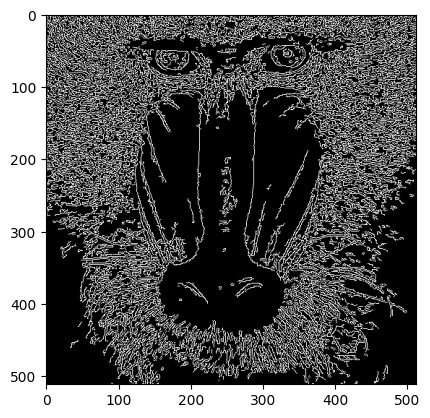

True

In [6]:
image = cv2.imread("imgs/mandril.jpg", cv2.IMREAD_COLOR_RGB)
canny = cv2.Canny(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), 100, 200)
plt.imshow(canny, cmap='gray') 
plt.show()
cv2.imwrite('imgs/mandril_canny.jpg', canny)

## Reducir por filas obteniendo su ratio de píxeles blancos, el valor de la fila con mayor número de estos y conteo de aquellas que tienen un valor de píxeles blancos mayor o igual al 90% del máximo

Fila con el mayor número de píxeles blancos: 12
Valor máximo de píxeles blancos en una fila: 56100
Filas con píxeles blancos mayor o igual al 90% del máximo: {6: 51765, 12: 56100, 15: 52020, 20: 51000, 21: 51255, 88: 50745, 100: 54060}


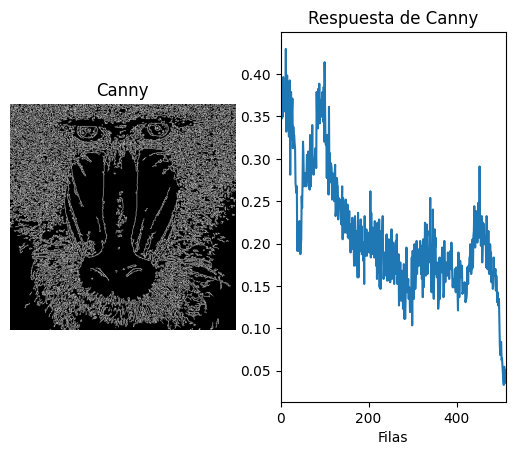

In [5]:
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1).flatten()

rows_ratio = row_counts / (255 * canny.shape[1])

max_index = np.argmax(row_counts)
max_fill = row_counts[max_index]
rows_task1 = {i: int(row_counts[i]) for i in range(len(row_counts)) if row_counts[i] >= 0.9 * max_fill}

print(f"Fila con el mayor número de píxeles blancos: {max_index}")
print(f"Valor máximo de píxeles blancos en una fila: {max_fill}")
print(f"Filas con píxeles blancos mayor o igual al 90% del máximo: {rows_task1}")

plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows_ratio)
plt.xlim([0, canny.shape[1]])

plt.savefig('imgs/mandril_canny_filas.jpg')

# Tarea 2: Aplicar umbralizado a la imagen resultante de Sobel, y posteriormente realizar conteo de filas y columnas no nulos. Calcular el valor máximo de la cuenta por filas y columnas y determinar aquellas por encima del 90% del máximo. Remarcar dichas filas y columnas en la imagen

## Aplicar Sobel

True

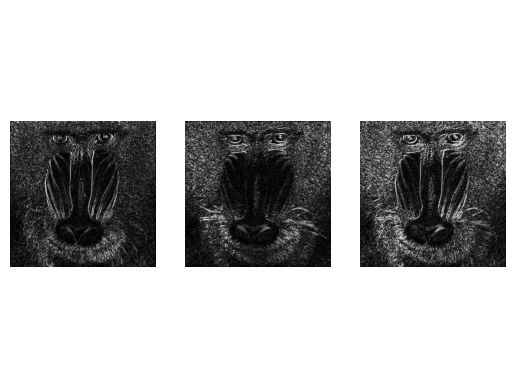

In [8]:
gaussian_image = cv2.GaussianBlur(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), (3, 3), 0)
sobel_y = cv2.Sobel(gaussian_image, cv2.CV_64F, 0, 1)
sobel_x = cv2.Sobel(gaussian_image, cv2.CV_64F, 1, 0)
sobel = cv2.convertScaleAbs(cv2.add(sobel_x, sobel_y))

plt.figure()
plt.axis('off')

plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(cv2.convertScaleAbs(sobel_x), cmap='gray')

plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(cv2.convertScaleAbs(sobel_y), cmap='gray')

plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(sobel, cmap='gray')

plt.savefig('imgs/mandril_sobel.jpg')
cv2.imwrite('imgs/mandril_sobel_vertical.jpg', sobel_x)
cv2.imwrite('imgs/mandril_sobel_horizontal.jpg', sobel_y)
cv2.imwrite('imgs/mandril_sobel_solo.jpg', sobel)

# Calcular histograma para identificar el umbral correcto

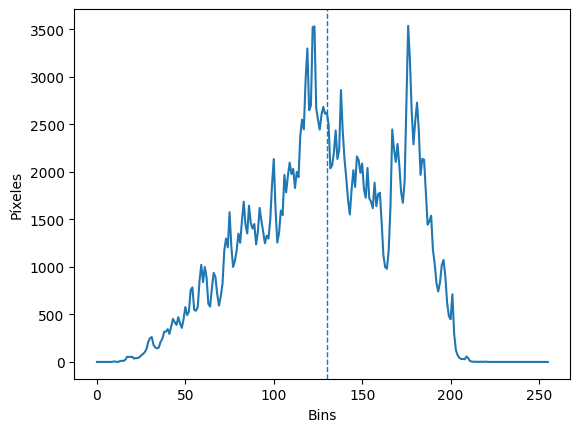

In [9]:
histogram = cv2.calcHist([cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)], [0], None, [256], [0, 256])

plt.figure()
plt.xlabel("Bins")
plt.ylabel("Píxeles")
plt.plot(histogram)

plt.axvline(x=130, linestyle='--', linewidth=1)

plt.savefig('imgs/mandril_histograma.jpg')

## Umbralizado de la imagen

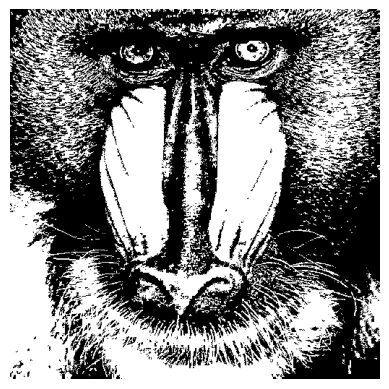

In [11]:
threshold = 130

_, threshold_image = cv2.threshold(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), threshold, 255, cv2.THRESH_BINARY)

plt.axis('off')
plt.imshow(threshold_image, cmap='gray')
plt.savefig('imgs/mandril_umbralizado.jpg')

## Conteo de filas y columnas con valores de píxeles no nulos

In [14]:
def count_above(image, p, axis):
    counts = np.count_nonzero(image, axis=axis)
    max_index = np.argmax(counts)
    max_value = counts[max_index]
    return {i: int(counts[i]) for i in range(len(counts)) if counts[i] > p*max_value}

In [12]:
rows = count_above(threshold_image, .9, 1)
columns = count_above(threshold_image, .9, 0)

[244 230 213 206 209 224 216 190 183 207 205 173 166 187 195 209 211 213
 232 228 195 222 245 246 250 227 205 187 157 158 135 145 130 135 126 117
 107 110  93  81 118 113  96 106  94 107 113 130 149 143 136 148 143 157
 160 169 173 148 152 187 202 175 185 185 192 201 203 194 206 199 185 207
 199 175 174 178 180 186 161 191 197 216 188 224 235 206 211 228 220 229
 236 210 239 219 209 191 231 213 226 189 177 216 251 230 219 249 275 279
 254 244 237 231 255 266 286 284 271 268 287 254 277 263 277 270 261 265
 281 291 308 283 287 293 297 277 276 280 284 285 318 318 290 295 326 312
 312 309 318 304 310 319 340 329 317 334 341 336 323 354 358 349 336 343
 336 318 314 343 346 318 335 331 339 335 333 323 314 337 333 318 319 324
 315 314 312 316 319 314 306 323 324 314 317 319 337 321 298 315 337 296
 326 323 319 291 314 314 298 302 276 267 288 263 288 309 303 285 284 288
 288 299 264 275 272 268 275 259 258 255 233 254 239 236 239 253 241 246
 244 231 232 236 218 208 207 219 219 208 224 222 22

## Remarcando con gráficas dichos valores en la imagen del mandril

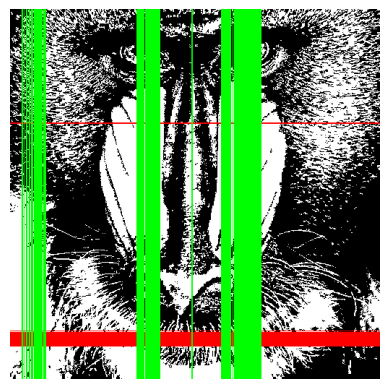

In [16]:
h, w = threshold_image.shape
threshold_image = cv2.cvtColor(threshold_image, cv2.COLOR_GRAY2RGB)

for row, value in rows.items():
    cv2.line(threshold_image, (0, row), (w, row), (255, 0, 0), 1)

for col, value in columns.items():
    cv2.line(threshold_image, (col, 0), (col, h), (0, 255, 0), 1)

plt.axis('off')
plt.imshow(threshold_image, cmap='gray')

plt.savefig('imgs/mandril_umbralizado_filas_columnas.jpg')

## Comparación de Sobel y Canny


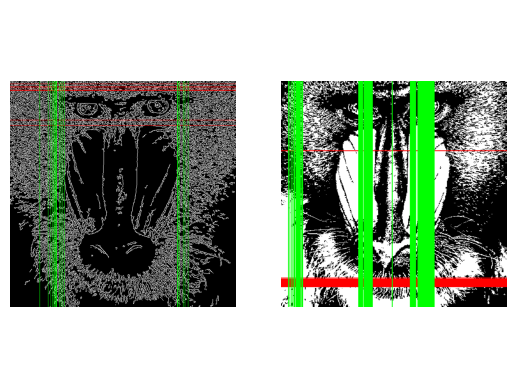

In [17]:
_, threshold_image_canny = cv2.threshold(canny, threshold, 255, cv2.THRESH_BINARY)

rows_canny = count_above(canny, .9, 1)
columns_canny = count_above(canny, .9, 0)

h, w = threshold_image_canny.shape
threshold_image_canny = cv2.cvtColor(threshold_image_canny, cv2.COLOR_GRAY2RGB)

for row, value in rows_canny.items():
    cv2.line(threshold_image_canny, (0, row), (w, row), (255, 0, 0), 1)

for col, value in columns_canny.items():
    cv2.line(threshold_image_canny, (col, 0), (col, h), (0, 255, 0), 1)

plt.figure()
plt.axis('off')

plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(threshold_image_canny, cmap='gray')

plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(threshold_image, cmap='gray')
plt.savefig('imgs/mandril_canny_vs_sobel.jpg')

# Tarea 3: Demostrador

## Clase realizada con las funciones del demostrador

In [2]:
from enum import Enum

class Demo(Enum):
    NEGATIVE = 0
    INVERT_GREEN = 1
    INVERT_RED = 2
    INVERT_BLUE = 3
    INVERTED_COLLAGE = 10
    CANNY = 4
    ISOLATE = 5
    SOBEL = 6
    THRESHOLD = 7

    @classmethod
    def apply_transformation(cls, image, transformation):
        methods_map = {
            cls.NEGATIVE: cls.inverted_collage,
            cls.INVERT_GREEN: cls.invert_green,
            cls.INVERT_RED: cls.invert_red,
            cls.INVERT_BLUE: cls.invert_blue,
            cls.INVERTED_COLLAGE: cls.inverted_collage,
            cls.CANNY: cls.canny,
            cls.ISOLATE: cls.isolate_color,
            cls.SOBEL: cls.sobel,
            cls.THRESHOLD: cls.threshold_function
        }
        if transformation in methods_map:
            return methods_map[transformation](image)
        else:
            raise ValueError(f"Transformación {transformation} no válida")

    @staticmethod
    def negative_image(image):
        return 255 - image
    
    @staticmethod
    def invert_green(image):
        image = image.copy()
        image[:,:,1] = 255 - image[:,:,1]
        return image

    @staticmethod
    def invert_red(image):
        image = image.copy()
        image[:,:,2] = 255 - image[:,:,2]
        return image

    @staticmethod
    def invert_blue(image):
        image = image.copy()
        image[:,:,0] = 255 - image[:,:,0]
        return image
    
    @staticmethod
    def inverted_collage(image):
        row1 = cv2.hconcat([Demo.negative_image(image), Demo.invert_red(image)])
        row2 = cv2.hconcat([Demo.invert_green(image), Demo.invert_blue(image)])

        return cv2.vconcat([row1, row2])
    
    @staticmethod
    def change_color_percentage(image, r=1, g=1, b=1):
        image = image.copy()
        image[:,:,0] = (image[:,:,0] * r) if r != -1 else 255 - image[:,:,0]
        image[:,:,1] = (image[:,:,1] * g) if g != -1 else 255 - image[:,:,1]
        image[:,:,2] = (image[:,:,2] * b)if b != -1 else 255 - image[:,:,2]
        return image
    
    @staticmethod
    def canny(image):
        return Demo.negative_image(cv2.Canny(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), 50, 200))
    
    @staticmethod
    def sobel(image):
        gaussian_image = cv2.GaussianBlur(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), (3, 3), 0)
        sobel_y = cv2.Sobel(gaussian_image, cv2.CV_64F, 0, 1)
        sobel_x = cv2.Sobel(gaussian_image, cv2.CV_64F, 1, 0)
        return cv2.convertScaleAbs(cv2.add(sobel_x, sobel_y))
    
    @staticmethod
    def isolate_color(image):
        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        mask = cv2.inRange(hsv, (20, 100, 70), (65, 255, 255))
        return cv2.bitwise_and(image, image, mask=mask)
    
    @staticmethod
    def threshold_function(image):
        threshold = 130
        threshold, threshold_image = cv2.threshold(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), threshold, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        threshold, threshold_image = cv2.threshold(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), threshold, 255, cv2.THRESH_BINARY)
        return threshold_image

## Clase realizada para la interfaz del demostrador

In [3]:
import tkinter as tk
from PIL import Image, ImageTk

class Demostrator:
    def __init__(self, root):
        self.root = root
        self.root.title("Video con Controles")

        self.video = cv2.VideoCapture(0)
        self.current_method = Demo.INVERTED_COLLAGE

        self.methods_map = {
            "1": Demo.INVERTED_COLLAGE,
            "2": Demo.CANNY,
            "3": Demo.ISOLATE,
            "4": Demo.SOBEL,
            "5": Demo.THRESHOLD
        }

        self.method_label = tk.Label(self.root, text=self.current_method)
        self.method_label.pack()

        self.video_label = tk.Label(self.root)
        self.video_label.pack()

        instrucciones = (
            "1 - INVERTED_COLLAGE\n"
            "2 - CANNY\n"
            "3 - ISOLATE\n"
            "4 - SOBEL\n"
            "5 - THRESHOLD\n"
            "ESC - Salir"
        )

        self.info_label = tk.Label(self.root, text=instrucciones, font=("Arial", 12))
        self.info_label.pack(pady=10)

        self.root.bind("<Key>", self.key_press)

        self.update_frame()

    def key_press(self, event):
        key = event.keysym
        if key in self.methods_map:
            self.current_method = self.methods_map[key]
            self.method_label.configure(text=self.current_method)
        elif key == "Escape":
            self.video.release()
            self.root.destroy()

    def normalize_frame_size(self, frame):
        max_width = 640
        max_height = 480
        h, w = frame.shape[:2]
        scale = min(max_width / w, max_height / h, 1)
        new_w, new_h = int(w * scale), int(h * scale)
        return cv2.resize(frame, (new_w, new_h))

    def update_frame(self):
        ret, frame = self.video.read()

        if not ret:
            return

        frame = cv2.flip(frame, 1)
        transformed = self.normalize_frame_size(Demo.apply_transformation(frame, self.current_method))

        img_rgb = cv2.cvtColor(transformed, cv2.COLOR_BGR2RGB)
        img_pil = Image.fromarray(img_rgb)
        img_tk = ImageTk.PhotoImage(image=img_pil)

        self.video_label.imgtk = img_tk
        self.video_label.configure(image=img_tk)

        self.root.after(10, self.update_frame)


if __name__ == "__main__":
    root = tk.Tk()
    app = Demostrator(root)
    root.mainloop()


# Tarea 4: Reinterpretación de Air Guitar (pincel virtual)

In [4]:
class VirtualPencil:
    def __init__(self, root):
        self.root = root
        self.video = cv2.VideoCapture(0)

        self.root.geometry("1000x700")

        for i in range(2):
            self.root.grid_rowconfigure(i, weight=1)
            self.root.grid_columnconfigure(i, weight=1)

        self.original_frame = tk.Label(self.root, bg="black")
        self.original_frame.grid(row=0, column=0, sticky="nsew")

        self.isolated_frame = tk.Label(self.root, bg="black")
        self.isolated_frame.grid(row=0, column=1, sticky="nsew")

        self.canvas_frame = tk.Label(self.root, bg="black")
        self.canvas_frame.grid(row=1, column=0, sticky="nsew")

        self.combined_frame = tk.Label(self.root, bg="black")
        self.combined_frame.grid(row=1, column=1, sticky="nsew")

        self.canvas = None
        self.last_coords = None

        self.root.bind("<Key>", self.key_press)

        self.update_frame()

    def reset_canvas(self):
        self.canvas = None

    def key_press(self, event):
        if event.keysym == "Escape":
            self.video.release()
            self.root.destroy()
        elif event.keysym in ("BackSpace", "Delete"):
            self.canvas = np.zeros_like(self.canvas)

    def resize_for_label(self, image, label):
        label.update_idletasks()
        w = label.winfo_width() or 400
        h = label.winfo_height() or 300
        resized = cv2.resize(image, (w, h))
        img_pil = Image.fromarray(resized)
        return ImageTk.PhotoImage(image=img_pil)

    def update_frame(self):
        ret, frame = self.video.read()

        if not ret:
            self.video.release()
            self.root.destroy()
            return

        frame = cv2.flip(frame, 1)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        if self.canvas is None:
            self.canvas = np.zeros_like(frame)

        hsv = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)

        lower_red1 = (0, 150, 120)
        upper_red1 = (10, 255, 255)
        lower_red2 = (170, 150, 120)
        upper_red2 = (180, 255, 255)

        mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
        mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
        mask = cv2.bitwise_or(mask1, mask2)

        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if contours:
            c = max(contours, key=cv2.contourArea)
            if cv2.contourArea(c) > 400:
                x, y, w, h = cv2.boundingRect(c)
                cx = x + w // 2
                cy = y

                cv2.circle(frame, (cx, cy), int(h * 0.15), (0, 255, 0), -1)
                cv2.circle(self.canvas, (cx, cy), int(h * 0.15), (255, 0, 0), -1)

                if self.last_coords:
                    cv2.line(self.canvas, self.last_coords, (cx, cy), (255, 0, 0), int(h * 0.15))

                cv2.line(frame, (x + w // 2, y), (x + w // 2, y + h), (0, 0, 255), 3)
                self.last_coords = (cx, cy)
            else:
                self.last_coords = None

        combined = cv2.add(frame, self.canvas)

        img1 = self.resize_for_label(frame, self.original_frame)
        img2 = self.resize_for_label(mask, self.isolated_frame)
        img3 = self.resize_for_label(self.canvas, self.canvas_frame)
        img4 = self.resize_for_label(combined, self.combined_frame)

        self.original_frame.imgtk = img1
        self.original_frame.config(image=img1)

        self.isolated_frame.imgtk = img2
        self.isolated_frame.config(image=img2)

        self.canvas_frame.imgtk = img3
        self.canvas_frame.config(image=img3)

        self.combined_frame.imgtk = img4
        self.combined_frame.config(image=img4)

        self.root.after(10, self.update_frame)


if __name__ == '__main__':
    root = tk.Tk()
    root.title("Virtual Pencil")
    app = VirtualPencil(root)
    root.mainloop()
